**Reddit - Sarcasm Analysis**  
  
I will use a dataset from kaggle which contains 1.3 million Sarcastic comments from the Internet commentary website Reddit to draw some insights about sarcasm using NLP and Machine learning.


**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Exploratory Data Analysis**

In [2]:
df = pd.read_csv('train-balanced-sarcasm.csv')

In [3]:
df.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


In [4]:
df = df.dropna()

In [5]:
data = df.head(10000)

In [6]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
data['month'] = data['date'].dt.month

/tmp/ipython-input-6-3963772050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
/tmp/ipython-input-6-3963772050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month


/tmp/ipython-input-7-2915662776.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')


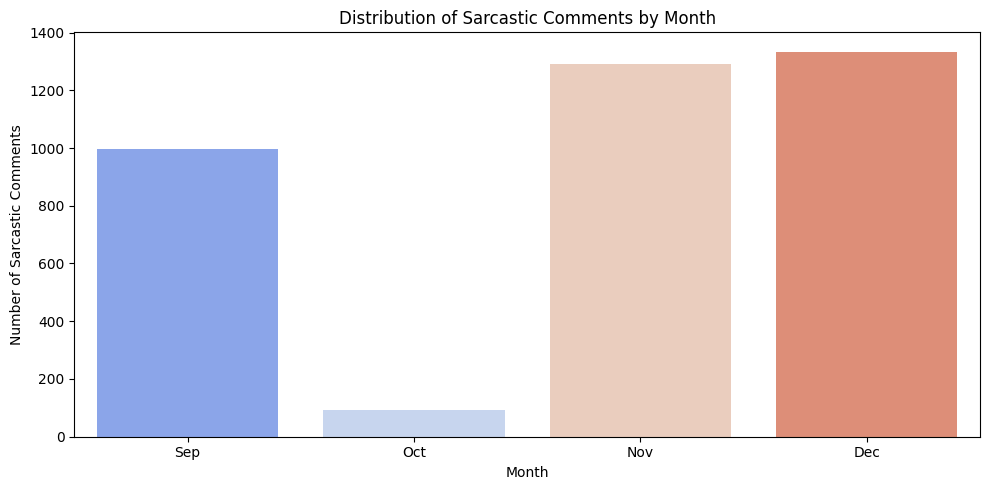

In [7]:
sarcastic_df = data[data['label'] == 1]
monthly_counts = sarcastic_df['month'].value_counts().sort_index()
month_labels = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_counts.index = monthly_counts.index.map(month_labels)
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')

plt.title("Distribution of Sarcastic Comments by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sarcastic Comments")
plt.tight_layout()
plt.show()

This visualization tells us that the comments in this dataset are only from months: september, october, november, and december

**Explainable Sarcasm Classifier**
  
Goal: Create a model that not only classifies sarcasm but highlights which words/phrases caused the classification.
  
Tools: LIME / SHAP for feature attribution.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['comment'])
y = data['label']

Using logistic regression for classification

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78      1258
           1       0.66      0.25      0.36       742

    accuracy                           0.67      2000
   macro avg       0.67      0.59      0.57      2000
weighted avg       0.67      0.67      0.63      2000



Using Random Forest for classification

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      1258
           1       0.57      0.34      0.42       742

    accuracy                           0.66      2000
   macro avg       0.63      0.59      0.59      2000
weighted avg       0.64      0.66      0.64      2000



Using SVM for Classification

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77      1258
           1       0.61      0.30      0.40       742

    accuracy                           0.67      2000
   macro avg       0.65      0.59      0.59      2000
weighted avg       0.66      0.67      0.64      2000



Sarcasm is notoriously hard to detect and hence the accuracy of 68%. I will now be making some changes in the pre-processing and embeddings to see if the accuracy can improve.

In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
X = model.encode(data['comment'].tolist(), show_progress_bar=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1258
           1       0.68      0.40      0.50       742

    accuracy                           0.71      2000
   macro avg       0.69      0.64      0.65      2000
weighted avg       0.70      0.71      0.68      2000



Using sentence transformers for embeddings has improved the accuracy just by a percent. A deeper dive into the classification report suggests that there is a class imbalance in performance. The model is favoring non-sarcastic comments (label 0). High recall for class 0 (88%) but very low recall for class 1 (38%) means: It's missing a lot of sarcastic comments (i.e., many false negatives).

In [14]:
print("Number of Sarcastic comments: ",len(data[data['label']==1]))
print("Number of non-Sarcastic comments: ",len(data[data['label']==0]))

Number of Sarcastic comments:  3711
Number of non-Sarcastic comments:  6289


There is a class imbalance with could explain the low recall for label 1. Let's try to fix that!

Increasing the sample size

In [15]:
data = df.head(20000)

Balancing by downsampling from the majority class

In [16]:
from sklearn.utils import resample

df_majority = data[data['label'] == 0]
df_minority = data[data['label'] == 1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

df_balanced = pd.concat([df_minority, df_majority_downsampled])

In [17]:
print("Number of Sarcastic comments: ",len(df_balanced[df_balanced['label']==1]))
print("Number of non-Sarcastic comments: ",len(df_balanced[df_balanced['label']==0]))

Number of Sarcastic comments:  7752
Number of non-Sarcastic comments:  7752


In [18]:
X = model.encode(df_balanced['comment'].tolist(), show_progress_bar=True)
y = df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

Batches:   0%|          | 0/485 [00:00<?, ?it/s]

SVM Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      1551
           1       0.64      0.64      0.64      1550

    accuracy                           0.64      3101
   macro avg       0.64      0.64      0.64      3101
weighted avg       0.64      0.64      0.64      3101



In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Logistic Regression Report:")
print(classification_report(y_test, lr.predict(X_test)))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1551
           1       0.65      0.64      0.64      1550

    accuracy                           0.65      3101
   macro avg       0.65      0.65      0.65      3101
weighted avg       0.65      0.65      0.65      3101



Balancing the dataset has lead to more faireness between classes. I'm now getting roughly equal performance on both classes. Accuracy is ~66%, which suggests the model captures some surface patterns, but sarcasm’s complexity isn’t being fully captured.

Now moving to some major improvements!  
I'll be using Hugging Face transformers to fine-tune a pre-trained model on the sarcasm dataset.

Combining the comment and parent comment for better context

In [20]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

df_balanced['combined'] = df_balanced['parent_comment'].fillna('') + " [SEP] " + df_balanced['comment']

In [21]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_balanced['combined'].tolist(), df_balanced['label'].tolist(), test_size=0.2, stratify=df_balanced['label'])

In [22]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

In [23]:
import torch

class SarcasmDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return {
            key: torch.tensor(val[idx])
            for key, val in self.encodings.items()
        } | {'labels': torch.tensor(self.labels[idx])}

train_dataset = SarcasmDataset(train_encodings, train_labels)
val_dataset = SarcasmDataset(val_encodings, val_labels)

In [25]:
import os
os.environ["WANDB_DISABLED"] = "true"

Model Training

In [26]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
training_args = TrainingArguments(
    output_dir="./results",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=100,
)

trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
100,0.679500
200,0.650800
300,0.635400
400,0.600300
500,0.599600
600,0.583500
700,0.590100
800,0.550500
900,0.430000
1000,0.452700


TrainOutput(global_step=2328, training_loss=0.4074291347228375, metrics={'train_runtime': 843.533, 'train_samples_per_second': 44.111, 'train_steps_per_second': 2.76, 'total_flos': 2447524814722560.0, 'train_loss': 0.4074291347228375, 'epoch': 3.0})

Model Evaluation

In [27]:
trainer.evaluate()

predictions = trainer.predict(val_dataset)
preds = predictions.predictions.argmax(-1)

print(classification_report(val_labels, preds))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1550
           1       0.69      0.72      0.71      1551

    accuracy                           0.70      3101
   macro avg       0.70      0.70      0.70      3101
weighted avg       0.70      0.70      0.70      3101

